<a href="https://colab.research.google.com/github/ungerleiderlab/test/blob/main/RNAseq_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNA-sequencing analysis workflow

### In this tutorial, we will:
  
1.   Download raw RNA-sequencing reads from a public repository.
2.   Determine the expression level of every gene in these samples (using a program called [kallisto](https://pachterlab.github.io/kallisto/))



There is a lot more information in these raw sequencing files than it may seem - it can be a major advantage to learn how to process the raw data.


These commands are essentially the same here as they would be if you wanted to run them locally using a linux/mac based terminal. This would require playing around with program installation and some other details, but the order and general structure of these commands would be almost the same.

# Download and setup kallisto

In [ ]:
# Download kallisto
!wget https://github.com/pachterlab/kallisto/releases/download/v0.46.0/kallisto_linux-v0.46.0.tar.gz

# Unzip it using the "tar" command
!tar -xf kallisto_linux-v0.46.0.tar.gz

# Move kallisto to somewhere it can be easily run
# When you want to copy something to another folder, you type "cp thing_to_copy place_you_want_it"
# "/usr/local/bin/" is somewhere the computer will know to look when you tell it to run kallisto
# The computer does not know kallisto is a thing unless it finds it in that folder.
!cp kallisto/kallisto /usr/local/bin/

In [ ]:
# Check your kallisto installation..if you just type "kallisto", will the computer know what to do?
!kallisto

# Download a human reference transcriptome




In [ ]:
# There are many sources for this.. ensembl, gencode, etc. Here, we will download the latest version from gencode.
!wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_48/gencode.v48.transcripts.fa.gz

In [ ]:
# Let's also grab the HPV16 and HPV18 sequences since we will be analyzing HeLa cells in this example

!wget -O HPV18.fa https://www.ebi.ac.uk/ena/browser/api/fasta/AY262282?download=true
!wget -O HPV16.fa https://www.ebi.ac.uk/ena/browser/api/fasta/KF954093.1?download=true

In [ ]:
# List all the files you now have using "ls"
!ls




**gencode.v48.transcripts.fa.gz** is your human reference transcriptome


In [ ]:
# Unzip this file
!gunzip gencode.v48.transcripts.fa.gz


In [ ]:
# Take a look inside by printing the first 20 lines of this file (the "head" command)
!head -20 gencode.v48.transcripts.fa


# Generate a transcriptome index

This is required and takes some time (~20m). Once this is built, you can use it for all subsequent alignments.

In [ ]:
!kallisto index -i human.kallisto gencode.v48.transcripts.fa HPV16.fa HPV18.fa

In [ ]:
# Check for your new index file ("human.kallisto")
!ls

# Download RNA-Sequencing reads




*   We will obtain sequencing reads from this paper: https://doi.org/10.1016/j.cell.2024.11.016
*   Find the accession number in the paper:




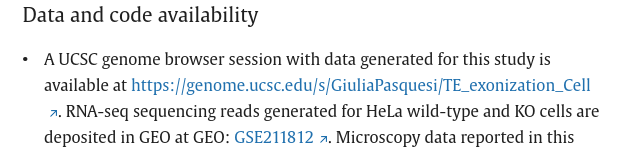

*   Click the "GSE211812" link in paper: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE211812




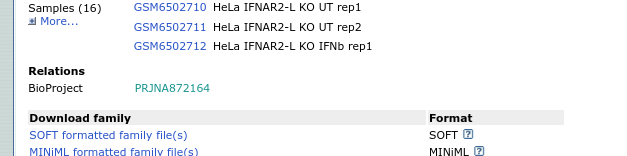

*    Copy the "BioProject text, "PRJNA872164" and search it on [sra-explorer.info](https://)

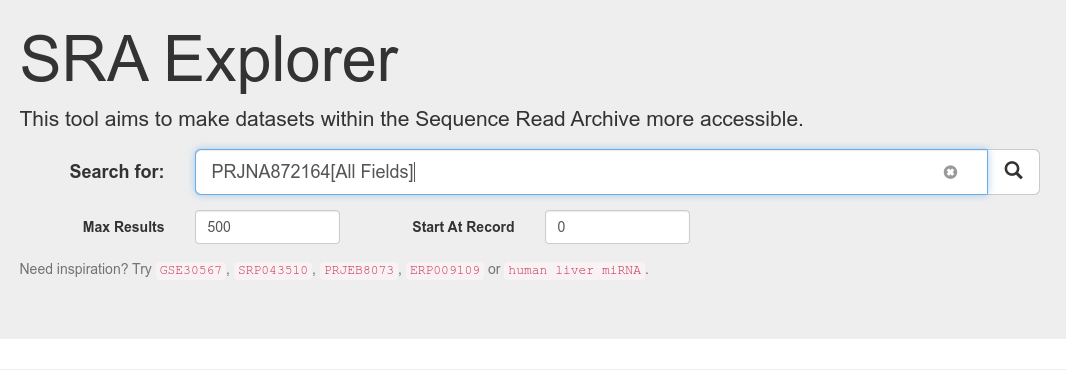

*    Add a checkmark to the following four samples:

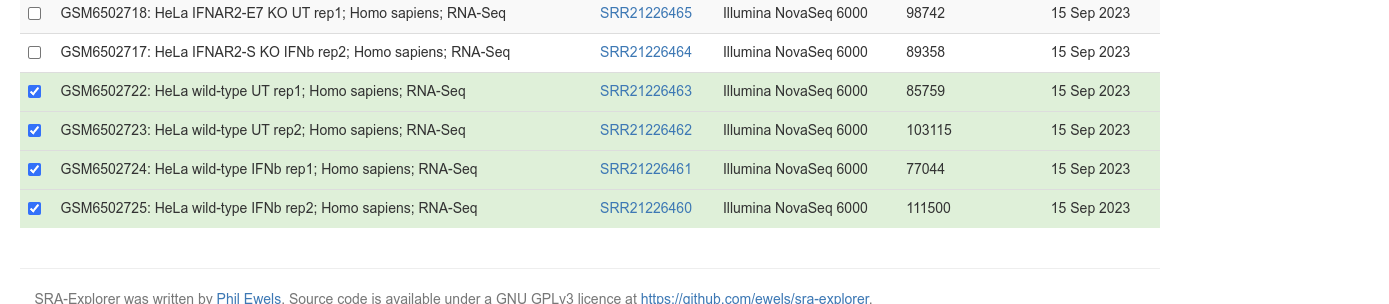

*    Click "Add 4 to collection" then click "4 saved datasets" then "Bash script for downloading FastQ files"

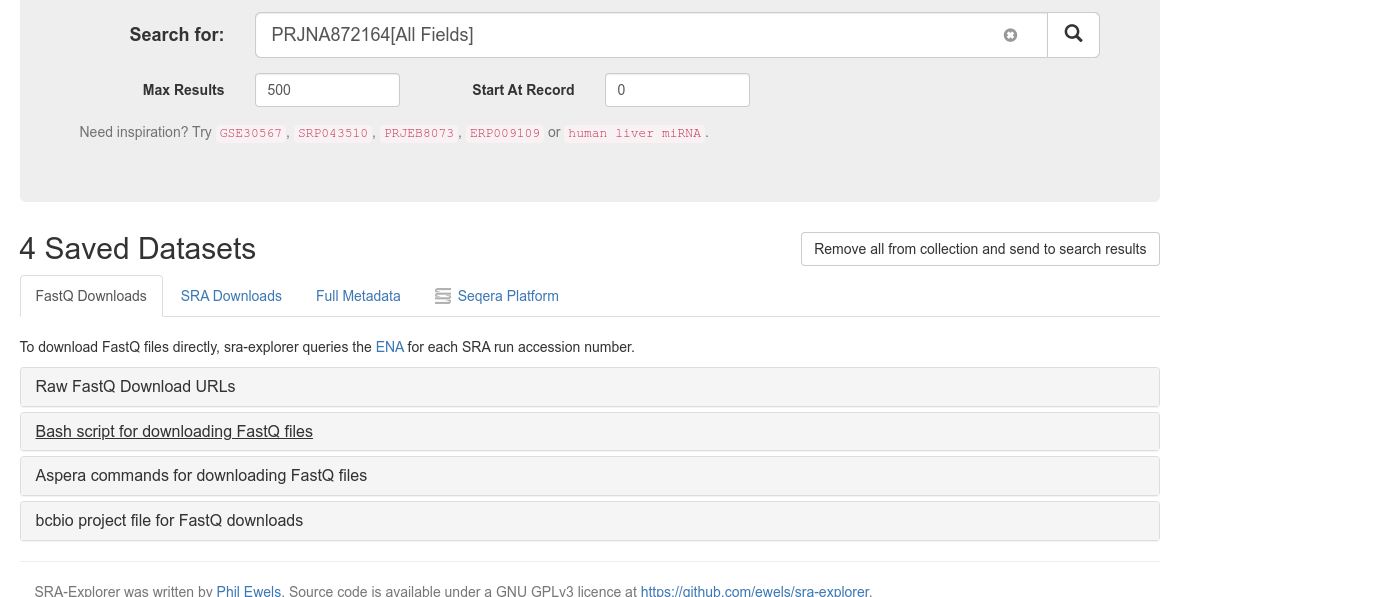

*    Copy the code (add "!" to each line) to download each sample

In [ ]:
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/063/SRR21226463/SRR21226463_1.fastq.gz -o SRR21226463_GSM6502722_HeLa_wild-type_UT_rep1_Homo_sapiens_RNA-Seq_1.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/063/SRR21226463/SRR21226463_2.fastq.gz -o SRR21226463_GSM6502722_HeLa_wild-type_UT_rep1_Homo_sapiens_RNA-Seq_2.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/060/SRR21226460/SRR21226460_1.fastq.gz -o SRR21226460_GSM6502725_HeLa_wild-type_IFNb_rep2_Homo_sapiens_RNA-Seq_1.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/060/SRR21226460/SRR21226460_2.fastq.gz -o SRR21226460_GSM6502725_HeLa_wild-type_IFNb_rep2_Homo_sapiens_RNA-Seq_2.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/062/SRR21226462/SRR21226462_1.fastq.gz -o SRR21226462_GSM6502723_HeLa_wild-type_UT_rep2_Homo_sapiens_RNA-Seq_1.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/062/SRR21226462/SRR21226462_2.fastq.gz -o SRR21226462_GSM6502723_HeLa_wild-type_UT_rep2_Homo_sapiens_RNA-Seq_2.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/061/SRR21226461/SRR21226461_1.fastq.gz -o SRR21226461_GSM6502724_HeLa_wild-type_IFNb_rep1_Homo_sapiens_RNA-Seq_1.fastq.gz
!curl -L ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR212/061/SRR21226461/SRR21226461_2.fastq.gz -o SRR21226461_GSM6502724_HeLa_wild-type_IFNb_rep1_Homo_sapiens_RNA-Seq_2.fastq.gz

In [ ]:
# What are the file names?
!ls *HeLa*

Notice that each sample has 2 .fastq files (this is called a "paired-end" experiment): "1.fastq.gz" and "2.fastq.gz" for each:

SRR21226460_GSM6502725_HeLa_wild-type_IFNb_rep2_Homo_sapiens_RNA-Seq_**1.fastq.gz**

SRR21226460_GSM6502725_HeLa_wild-type_IFNb_rep2_Homo_sapiens_RNA-Seq_**2.fastq.gz**


- To speed things up we will extract the first 1 million lines of each fastq file. This will be using the linux command, "head" and saving the output to a new file using the ">" command.

- If you were doing this somewhere else (your computer, some server, etc), these alignments would take less that 10 minutes each as full files. On free colab accounts, the speed is limited. Outside this tutorial, you should analyze the full files.


How to use the "head" command:
- Rhe following will take the first 10 lines of "file.txt" and save it as "newfile.txt":
```
head -10 file.txt > newfile.txt
```

Now we will do that to our fastq files, except we are saving the first 1,000,000 lines:



In [ ]:
!head -1000000 SRR21226460_GSM6502725_HeLa_wild-type_IFNb_rep2_Homo_sapiens_RNA-Seq_1.fastq.gz > IFNb_replicate2_1.fastq.gz
!head -1000000 SRR21226460_GSM6502725_HeLa_wild-type_IFNb_rep2_Homo_sapiens_RNA-Seq_2.fastq.gz > IFNb_replicate2_2.fastq.gz
!head -1000000 SRR21226461_GSM6502724_HeLa_wild-type_IFNb_rep1_Homo_sapiens_RNA-Seq_1.fastq.gz > IFNb_replicate1_1.fastq.gz
!head -1000000 SRR21226461_GSM6502724_HeLa_wild-type_IFNb_rep1_Homo_sapiens_RNA-Seq_2.fastq.gz > IFNb_replicate1_2.fastq.gz
!head -1000000 SRR21226462_GSM6502723_HeLa_wild-type_UT_rep2_Homo_sapiens_RNA-Seq_1.fastq.gz > UT_replicate2_1.fastq.gz
!head -1000000 SRR21226462_GSM6502723_HeLa_wild-type_UT_rep2_Homo_sapiens_RNA-Seq_2.fastq.gz > UT_replicate2_2.fastq.gz
!head -1000000 SRR21226463_GSM6502722_HeLa_wild-type_UT_rep1_Homo_sapiens_RNA-Seq_1.fastq.gz > UT_replicate1_1.fastq.gz
!head -1000000 SRR21226463_GSM6502722_HeLa_wild-type_UT_rep1_Homo_sapiens_RNA-Seq_2.fastq.gz > UT_replicate1_2.fastq.gz

# Align RNA-Sequencing reads

Time to run kallisto to turn sequencing reads into transcript abundance values.



```
kallisto quant -i index -o output_folder -t threads reads1 reads2
```



In [ ]:
!kallisto quant \
  -i human.kallisto \
  -o IFNb_replicate2 \
  -t 2 \
  IFNb_replicate2_1.fastq.gz \
  IFNb_replicate2_2.fastq.gz

In [ ]:
!kallisto quant \
  -i human.kallisto \
  -o IFNb_replicate1 \
  -t 2 \
  IFNb_replicate1_1.fastq.gz \
  IFNb_replicate1_2.fastq.gz

In [ ]:
!kallisto quant \
  -i human.kallisto \
  -o UT_replicate2 \
  -t 2 \
  UT_replicate2_1.fastq.gz \
  UT_replicate2_2.fastq.gz


In [ ]:
!kallisto quant \
  -i human.kallisto \
  -o UT_replicate1 \
  -t 2 \
  UT_replicate1_1.fastq.gz \
  UT_replicate1_2.fastq.gz

# Process transcript expression values

In [ ]:
!mkdir processed_files

In [ ]:
# Now we are using the python programming language. This can be done in R, excel, wherever.

import pandas as pd
import matplotlib.pyplot as plt

def classify(y):
    if 'ENST' in y:
        return y.split('|')[5]
    elif 'KF954093' in y:
        return 'HPV16'
    elif 'AY262282' in y:
        return 'HPV18'

# Function that will sum all transcript isoforms to get a single value for each gene.
def transcript_to_gene(kallisto_output):
    df = pd.read_table(kallisto_output)
    df['gene'] = df['target_id'].map(classify)
    df = df.groupby('gene')['tpm'].sum()
    samplename = kallisto_output.split('/')[0]
    df.to_csv("processed_files/" +samplename + ".tpm_values.tsv", sep='\t')
    print(samplename + " processed...")



In [ ]:
samples = ["UT_replicate1", "UT_replicate2", "IFNb_replicate1", "IFNb_replicate2"]
for sample in samples:
    transcript_to_gene(sample + "/abundance.tsv")


In [ ]:
df = pd.read_table("processed_files/UT_replicate1.tpm_values.tsv", index_col=0)
df.columns = ['UT_replicate1']
for sample in samples[1:]:
    x = pd.read_table("processed_files/" + sample + ".tpm_values.tsv", index_col=0)
    df[sample] = x['tpm']

In [ ]:
df.head()

# Plot gene expression values

In [ ]:
# First plot HPV16 and HPV18 mapped reads in these samples (HeLa cells)

fig, ax = plt.subplots(figsize=(4,6))
plt.scatter([0,1,2,3],df.loc['HPV16'], ec='k',s=400,label="HPV16")
plt.scatter([0,1,2,3],df.loc['HPV18'], ec='k',s=400, label="HPV18")
ax.set_xticklabels(['UT1','UT2','IFNb1','IFNb2'], fontsize=14)
ax.set_xticks([0,1,2,3])
ax.set_ylabel("Transcripts per million",fontsize=14)
plt.xlim([-.5,3.5])
plt.yticks(fontsize=14)
fig.legend(loc=5)

In [ ]:
# A simple function that will generate a barplot for an input gene
def plotgene(gene):
    gene = gene.upper()
    if gene not in df.index:
        print(gene + " not found")
        return
    df.loc[gene].plot.bar(color=["b","b","r","r"], ec='k')
    plt.title(gene, fontsize=14)
    plt.ylabel("Transcripts per million",fontsize=14)
    ax = plt.gca()
    ax.set_xticklabels(['UT1','UT2','IFNb1','IFNb2'],fontsize=14)
    ax.set_xticks([0,1,2,3])
    plt.yticks(fontsize=14)


In [ ]:
# To plot any gene, just use the following:
# plotgene("genename")

plotgene("MX1")

# MX1 is an IFN stimulated gene.

In [ ]:
# So is OAS1..
plotgene("OAS1")

In [ ]:
# Try any gene here
plotgene("")